In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from geopy.distance import geodesic
# Cargar el archivo tmin.xlsx que contiene los municipios de cada estación
tmin_path = 'data/tmin.xlsx'
tmin_df = pd.read_excel(tmin_path)

# Cargar el archivo tmean.xlsx en el que queremos agregar la columna 'Municipio'
tmean_path = 'data/tmean.xlsx'
tmean_df = pd.read_excel(tmean_path)

# Realizar el merge para agregar la columna 'Municipio' al archivo tmean.xlsx usando 'CodigoEstacion'
estaciones_df = pd.merge(tmean_df, tmin_df[['CodigoEstacion', 'Municipio']], on='CodigoEstacion', how='left')
estaciones_df = estaciones_df.drop_duplicates()

In [39]:
# Cargar el archivo CSV con los reportes de delitos
csv_path = 'data/delitos.csv'
delitos_df = pd.read_csv(csv_path)

# Filtrar el departamento "Santander" y convertir fechas a formato datetime
santander_delitos_df = delitos_df[delitos_df['DEPARTAMENTO'] == 'SANTANDER']
santander_delitos_df['FECHA HECHO'] = pd.to_datetime(santander_delitos_df['FECHA HECHO'], dayfirst=True, infer_datetime_format=True)


# Agrupar los delitos por mes y municipio
delitos_mes_df = santander_delitos_df.groupby([santander_delitos_df['FECHA HECHO'].dt.to_period('M'), 'MUNICIPIO']).size().reset_index(name='casos')
delitos_mes_df['FECHA HECHO'] = delitos_mes_df['FECHA HECHO'].dt.to_timestamp()

C:\Users\LUISRODRIGUEZ\AppData\Local\Temp\ipykernel_14768\3685385405.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  santander_delitos_df['FECHA HECHO'] = pd.to_datetime(santander_delitos_df['FECHA HECHO'], dayfirst=True, infer_datetime_format=True)
C:\Users\LUISRODRIGUEZ\AppData\Local\Temp\ipykernel_14768\3685385405.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  santander_delitos_df['FECHA HECHO'] = pd.to_datetime(santander_delitos_df['FECHA HECHO'], dayfirst=True, infer_datetime_format=True)


In [40]:
estaciones_df

,CodigoEstacion,Latitud,Longitud,Altitud,Fecha,Valor_max,Valor_min,Valor_medio,Municipio
0,23195502,7.121472,-73.184528,1189,2000-01-01,23.965188,17.560887,20.763038,lebrija
214,23195502,7.121472,-73.184528,1189,2000-02-01,24.037069,17.985632,21.011351,lebrija
428,23195502,7.121472,-73.184528,1189,2000-03-01,24.156183,18.191250,21.173716,lebrija
642,23195502,7.121472,-73.184528,1189,2000-04-01,24.881111,18.677917,21.779514,lebrija
856,23195502,7.121472,-73.184528,1189,2000-05-01,24.751049,18.933286,21.842167,lebrija
...,...,...,...,...,...,...,...,...,...
1240654,24055030,6.792778,-73.282750,1810,2024-06-01,24.594444,14.843889,19.719167,zapatoca
1240885,24055030,6.792778,-73.282750,1810,2024-07-01,25.022043,14.602151,19.812097,zapatoca
1241116,24055030,6.792778,-73.282750,1810,2024-08-01,24.841398,14.027299,19.434348,zapatoca
1241347,24055030,6.792778,-73.282750,1810,2024-09-01,25.015000,13.905833,19.460417,zapatoca


In [41]:
delitos_mes_df

,FECHA HECHO,MUNICIPIO,casos
0,2003-01-01,BUCARAMANGA,2
1,2003-02-01,FLORIDABLANCA,1
2,2003-04-01,BARRANCABERMEJA,1
3,2003-07-01,BARRANCABERMEJA,1
4,2003-07-01,LEBRIJA,1
...,...,...,...
2242,2024-09-01,SABANA DE TORRES,5
2243,2024-09-01,SAN GIL,1
2244,2024-09-01,SAN JOSE DE MIRANDA,1
2245,2024-09-01,SOCORRO,2


In [42]:
estaciones_df.rename(columns={'MUNICIPIO': 'Municipio'}, inplace=True)
delitos_mes_df.rename(columns={'FECHA HECHO': 'Fecha'}, inplace=True)
delitos_mes_df.rename(columns={'MUNICIPIO': 'Municipio'}, inplace=True)

# Estandarizar los nombres de municipios en minúsculas en ambos DataFrames
estaciones_df['Municipio'] = estaciones_df['Municipio'].str.lower()
delitos_mes_df['Municipio'] = delitos_mes_df['Municipio'].str.lower()

# Realizar el merge en base a las columnas de fecha y municipio
merged_df = pd.merge(estaciones_df, delitos_mes_df, left_on=['Fecha', 'Municipio'], right_on=['Fecha', 'Municipio'], how='inner')

# Verificar el resultado
print(merged_df.head())

   CodigoEstacion   Latitud   Longitud  Altitud      Fecha  Valor_max  \
0        23195502  7.121472 -73.184528     1189 2003-07-01  25.412097   
1        23195502  7.121472 -73.184528     1189 2004-02-01  26.214943   
2        23195502  7.121472 -73.184528     1189 2008-08-01  25.710618   
3        23195502  7.121472 -73.184528     1189 2009-09-01  27.496806   
4        23195502  7.121472 -73.184528     1189 2012-02-01  26.012356   

   Valor_min  Valor_medio Municipio  casos  
0  18.489382    21.950739   lebrija      1  
1  18.770115    22.492529   lebrija      1  
2  18.020968    21.865793   lebrija      1  
3  18.988611    23.242708   lebrija      1  
4  18.295977    22.154167   lebrija      1  


In [43]:
estaciones_df['Municipio'].unique()

array(['lebrija', 'barrancabermeja', 'albania', 'tona', 'suratá',
       'puerto parra', 'capitanejo', 'el carmen', 'charalá', 'chima',
       'cimitarra', 'pinchote', 'mogotes', 'gámbita', 'puerto wilches',
       'socorro', 'guadalupe', 'landázuri', 'girón', 'palmar', 'cerrito',
       'bucaramanga', 'vélez', 'sabana de torres', 'zapatoca'],
      dtype=object)

In [44]:
delitos_mes_df['Municipio'].unique()

array(['bucaramanga', 'floridablanca', 'barrancabermeja', 'lebrija',
       'socorro', 'sabana de torres', 'san gil', 'onzaga', 'suaita',
       'giron', 'matanza', 'el playon', 'el carmen de chucuri',
       'zapatoca', 'piedecuesta', 'chipata', 'betulia', 'rionegro',
       'cimitarra', 'puerto wilches', 'charala', 'la paz', 'barbosa',
       'california', 'gambita', 'san andres', 'simacota', 'los santos',
       'san vicente de chucuri', 'aratoca', 'valle de san jose',
       'pinchote', 'barichara', 'puerto parra', 'florian', 'enciso',
       'confines', 'galan', 'bolivar', 'jesus maria', 'villanueva',
       'ocamonte', 'san jose de miranda', 'surata', 'cerrito', 'el peñon',
       'oiba', 'concepcion', 'mogotes', 'velez', 'landazuri', 'aguada',
       'guadalupe', 'encino', 'chima', 'capitanejo',
       'santa helena del opon', 'malaga', 'puente nacional', 'vetas',
       'guavata', 'paramo', 'san miguel', 'santa barbara', 'el guacamayo',
       'palmas del socorro', 'coromoro', 

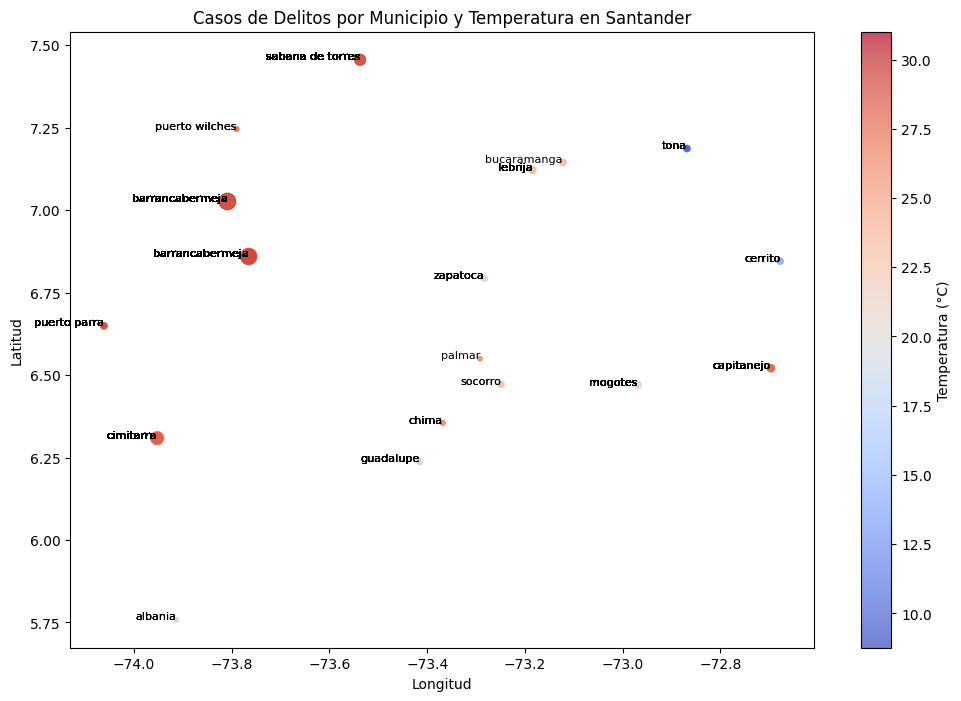

In [33]:
# Crear un gráfico tipo cluster de los delitos por mes y temperatura
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    merged_df['Longitud'], merged_df['Latitud'],
    c=merged_df['Valor_medio'], cmap='coolwarm', s=merged_df['casos']*10, alpha=0.7
)
plt.colorbar(scatter, label='Temperatura (°C)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Casos de Delitos por Municipio y Temperatura en Santander')

# Agregar etiquetas de municipios en el gráfico
for i, municipio in enumerate(merged_df['Municipio']):
    plt.text(
        merged_df['Longitud'].iloc[i], merged_df['Latitud'].iloc[i],
        municipio, fontsize=8, ha='right'
    )

plt.show()
